# Receiver code example
In this example, Python code will read PD current from the serial port. The sampling frequency (timelapse between each samples, 10ms by default) is controlled in the Arduino Code. The reading is stored in 'received_raw_data.txt'

In [65]:
import serial
import time

port = 'COM8' 
baudrate = 115200
duration = 5

import serial

def read_serial_and_save(file_path):
    with serial.Serial(port, baudrate) as arduino, open(file_path, 'w') as file:
        arduino.timeout = 1  # Set timeout for serial read
        end_time = time.time() + duration  # Run for 'duration' seconds
        while time.time() < end_time:
            if arduino.in_waiting > 0:
                data = arduino.readline().decode().strip()
                file.write(data + '\n')
                print(data)

if __name__ == "__main__":
    save_path = "received_raw_data.txt"
    read_serial_and_save(save_path)


0
1
0
0
0
0
0
1
0
1
0
1
1
0
0
0
0
1
1
0
2
0
0
0
1
0
0
0
0
1
1
0
1
1
0
0
0
0
0
0
1
1
0
1
0
1
1
1
1
1
0
0
1
0
0
0
0
2
2
1
0
0
0
2
1
0
0
3
1
0
0
0
0
1
0
0
2
0
1
1
0
2
1
0
0
0
0
1
0
0
2
0
0
0
1
0
1
0
0
1
0
1
0
0
1
2
0
1
2
1
0
1
2
1
0
3
0
0
0
0
0
1
1
0
1
2
0
1
1
1
2
1
2
2
0
2
1
0
0
0
1
0
1
0
0
1
1
0
0
0
0
0
0
1
1
0
0
1
0
1
0
0
1
1
0
1
0
2
2
0
1
2
2
1
2
0
0
0
1
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
65
67
65
35
67
103
105
35
67
103
107
65
66
147
34
148
32
103
32
35
66
104
104
63
66
147
35
147
37
105
36
35
66
103
36
68
36
103
33
36
65
146
62
32
67
101
67
67
67
145
33
146
65
145
67
35
35
106
36
35
66
103
146
64
66
106
64
63
69
147
36
145
66
150
37
150
64
106
32
67
68
104
66
149
67
103
67
63
36
106
33
67
0
0
0
0
0
0
2
2
1
1
1
1
0
0
0
0
1
0
1
0
0
1
0
1
2
0
2
0
0
0
0
0
1
0
0
1
1
0
1
1
1
1
2
1
0
0
2
1
0
1
2
1
0
0
1
0
0
0
0
0
0
1
1
0
2
0
0
0
0
0
1
1
0
2
0
1
1
0
0
0
1
0
0
0
0
0
0
0
3
1
0
2
1
0
1
2
0
0
0
1
1
0
0
2
0
0
0
0
1
2
0
1
1
1
0
0
0
0
0
1
0
1
0
0
1
1
0
1
1
0
0
1
2
0
1
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
2

# Translator code example
In this example, Python code will translate PD current reading into 0 and 1s and reconstruct the original message.

In [ ]:
# translate PD current reading into a single bit (0 or 1) 
f = open("received_message.txt", "w")
while(index<raw_signal_data.shape[0]):
    reading=raw_signal_data[index]
    if reading>50:
        f.write("1")
    else:
        f.write("0")
    index=index+interval
f.close()


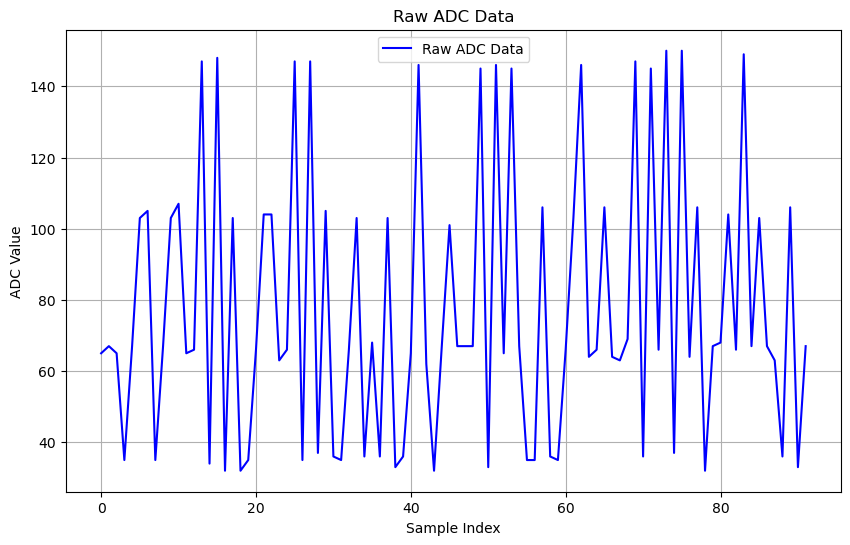

In [73]:
import numpy as np
import matplotlib.pyplot as plt

def load_signal(filename):
    with open(filename, 'r') as f:
        signal = [float(line.strip()) for line in f]
    return np.array(signal)
    
filename = 'received_raw_data.txt'  # Replace with your file name
raw_signal = load_signal(filename)
raw_signal_data=raw_signal[raw_signal>5]
#print(raw_signal_data)

plt.figure(figsize=(10, 6))
plt.plot(raw_signal_data, label="Raw ADC Data", color='blue', linestyle='-')
plt.xlabel("Sample Index")
plt.ylabel("ADC Value")
plt.title("Raw ADC Data")
plt.legend()
plt.grid(True)
plt.show()

interval=1; 
index=0
f = open("received_message.txt", "w")
#translating current readings into 2-bit groups
while(index<raw_signal_data.shape[0]):
    reading=raw_signal_data[index]
    if reading>140:
        f.write("11")
    else:
        if reading>100:
            f.write("10")
        else:
            if reading>50:
                f.write("01")
            else:
                f.write("00")
    index=index+interval
f.close()


# Accuracy code example
In this example, Python code will calculate the accuracy of the transmission

In [75]:
def count_matching_characters(file1_path, file2_path):
    try:
        with open(file1_path, 'r') as file1, open(file2_path, 'r') as file2:
            words1 = file1.read().split()  # Split content into words
            words2 = file2.read().split()
        
        match_count = 0
        
        for word1, word2 in zip(words1, words2):
            for char1, char2 in zip(word1, word2):
                if char1 == char2:
                    match_count += 1

        return match_count
    except FileNotFoundError as e:
        print(f"Error: {e}")
        return 0
    


# Input file paths
message_file_path = 'message_small.txt'  # Replace with your first file path
decoded_message_path = 'received_message.txt'  # Replace with your second file path

with open(message_file_path, 'r') as file:
    line = file.readline().strip() 
total_count = len(line)

matching_characters = count_matching_characters(message_file_path, decoded_message_path)

print(f"Number of bits in the input message: {total_count}")
print(f"Number of matching bits: {matching_characters}")

Number of bits in the input message: 184
Number of matching bits: 184
